# Training Convnet from scratch on a small dataset

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import keras
keras.__version__

from keras import layers, models, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [4]:
root_path = '.'

train_dir = os.path.join(root_path, 'train')
val_dir = os.path.join(root_path, 'validation')
test_dir = os.path.join(root_path, 'test')

## Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                                    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

## Data preprocessing

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## First training

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 37s 369ms/step - loss: 0.6896 - accuracy: 0.5305 - val_loss: 0.6647 - val_accuracy: 0.6270
Epoch 2/30
100/100 [==============================] - 35s 350ms/step - loss: 0.6618 - accuracy: 0.6150 - val_loss: 0.7404 - val_accuracy: 0.5750
Epoch 3/30
100/100 [==============================] - 35s 351ms/step - loss: 0.6124 - accuracy: 0.6695 - val_loss: 0.6184 - val_accuracy: 0.6650
Epoch 4/30
100/100 [==============================] - 35s 352ms/step - loss: 0.5635 - accuracy: 0.7195 - val_loss: 0.6139 - val_accuracy: 0.6880
Epoch 5/30
100/100 [==============================] - 36s 358ms/step - loss: 0.5418 - accuracy: 0.7205 - val_loss: 0.5877 - val_accuracy: 0.6540
Epoch 6/30
100/100 [==============================] - 37s 367ms/step - loss: 0.5103 - accuracy: 0.7480 - val_loss: 0.5131 - val_accuracy: 0.6660
Epoch 7/30
100/100 [==============================] - 36s 360ms/step - loss: 0.4859 - accuracy: 0.7605 - val_loss: 0.7900 - val_ac

In [11]:
model.save('cats_and_dogs_small_2.h5')

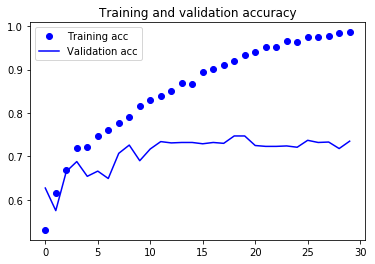

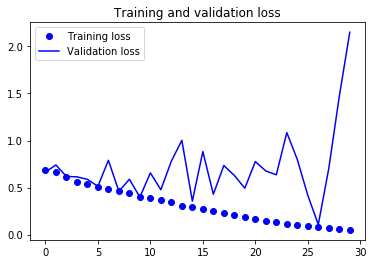

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Observation**: Our model is overfitting!

## Using data augmentation

In [16]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

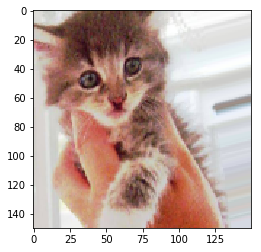

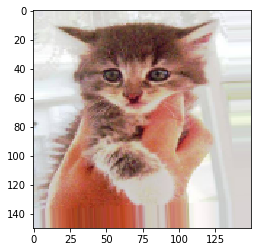

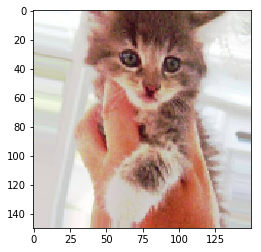

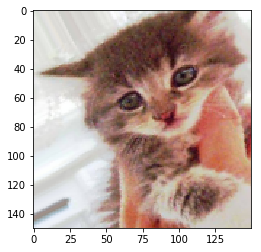

In [17]:
train_cats_dir = os.path.join(root_path, 'train/cats')
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## Second model with dropout

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

## Second training with augmented data

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 59s 592ms/step - loss: 0.6912 - accuracy: 0.5204 - val_loss: 0.7161 - val_accuracy: 0.5990
Epoch 2/100
100/100 [==============================] - 59s 593ms/step - loss: 0.6789 - accuracy: 0.5609 - val_loss: 0.6688 - val_accuracy: 0.5979
Epoch 3/100
100/100 [==============================] - 57s 574ms/step - loss: 0.6673 - accuracy: 0.5868 - val_loss: 0.6276 - val_accuracy: 0.6326
Epoch 4/100
100/100 [==============================] - 59s 591ms/step - loss: 0.6531 - accuracy: 0.6024 - val_loss: 0.6570 - val_accuracy: 0.5947
Epoch 5/100
100/100 [==============================] - 56s 564ms/step - loss: 0.6352 - accuracy: 0.6269 - val_loss: 0.5576 - val_accuracy: 0.6523
Epoch 6/100
100/100 [==============================] - 58s 584ms/step - loss: 0.6179 - accuracy: 0.6583 - val_loss: 0.6500 - val_accuracy: 0.6959
Epoch 7/100
100/100 [===================

100/100 [==============================] - 58s 582ms/step - loss: 0.4334 - accuracy: 0.7981 - val_loss: 0.5604 - val_accuracy: 0.7635
Epoch 57/100
100/100 [==============================] - 60s 596ms/step - loss: 0.4346 - accuracy: 0.7959 - val_loss: 0.2434 - val_accuracy: 0.8009
Epoch 58/100
100/100 [==============================] - 58s 582ms/step - loss: 0.4258 - accuracy: 0.8081 - val_loss: 0.3755 - val_accuracy: 0.7919
Epoch 59/100
100/100 [==============================] - 58s 581ms/step - loss: 0.4308 - accuracy: 0.8003 - val_loss: 0.2481 - val_accuracy: 0.8022
Epoch 60/100
100/100 [==============================] - 58s 584ms/step - loss: 0.4117 - accuracy: 0.7996 - val_loss: 0.4467 - val_accuracy: 0.7697
Epoch 61/100
100/100 [==============================] - 59s 586ms/step - loss: 0.4285 - accuracy: 0.7967 - val_loss: 0.4816 - val_accuracy: 0.8151
Epoch 62/100
100/100 [==============================] - 60s 599ms/step - loss: 0.4189 - accuracy: 0.8087 - val_loss: 0.3969 - val_a

In [21]:
model.save('cats_and_dogs_small_2.h5')

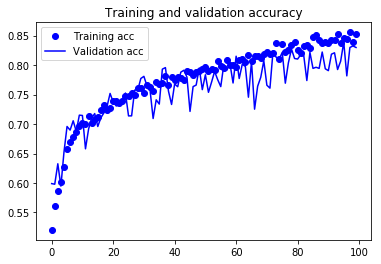

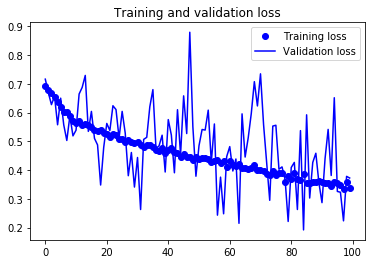

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

There is no more overfitting and we obtain around 85% accuracy.